# Visualizing the contraction property of transition matrix of Markov Chains

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_transition_matrix(size):
    P = np.random.random([size,size])
    for row in range(size):
        P[row,:] = P[row,:]/sum(P[row,:])
    return P

In [3]:
n_points = 100
n_steps = 100

In [4]:
P = generate_transition_matrix(2)
dist = np.vstack((np.linspace(0,1,n_points),np.linspace(1,0,n_points))).T

In [5]:
dist_t = np.zeros([100,3,n_steps])
for i in range(n_steps):
    dist_t[:,0:2,i] = np.matmul(dist,np.linalg.matrix_power(P,i))
    dist_t[:,2,i] = i

In [6]:
dist_t_swap = np.swapaxes(dist_t,1,2)
dist_t_swap = np.swapaxes(dist_t_swap,0,1)

In [10]:
dist_t

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.01010101e-02,   9.89898990e-01,   0.00000000e+00],
       [  2.02020202e-02,   9.79797980e-01,   0.00000000e+00],
       ..., 
       [  2.23778272e-01,   7.76221728e-01,   9.90000000e+01],
       [  2.23778272e-01,   7.76221728e-01,   9.90000000e+01],
       [  2.23778272e-01,   7.76221728e-01,   9.90000000e+01]])

In [7]:
dist_t = np.reshape(dist_t_swap,(n_steps*n_points,3))

<IPython.core.display.Javascript object>


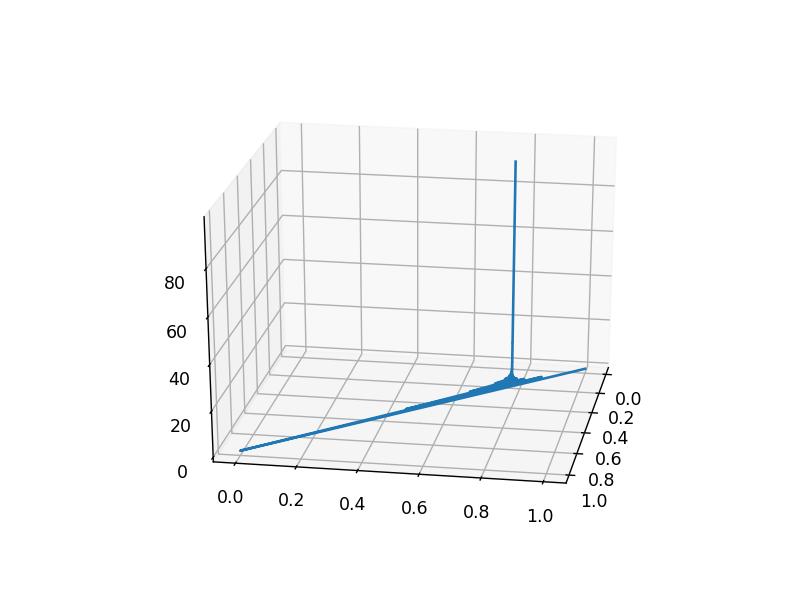

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dist_t[:,0],dist_t[:,1],dist_t[:,2])